Explore market data.
=====


In [1]:
from mypo import Loader

In [2]:
loader = Loader()
loader.get('VOO', expense_ratio=0.0003)
loader.get('EDV', expense_ratio=0.0007)

<AxesSubplot:xlabel='Date'>

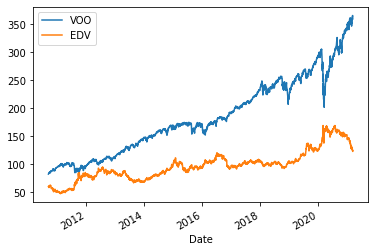

In [3]:
market = loader.get_market()
market.get_raw().plot()

In [4]:
index = market.get_index()
print(index[0])
print(index[-1])

2010-09-09 00:00:00
2021-03-19 00:00:00


<AxesSubplot:xlabel='Date'>

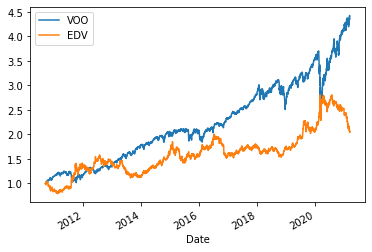

In [5]:
market.get_normalized_prices().plot()


<AxesSubplot:xlabel='Date'>

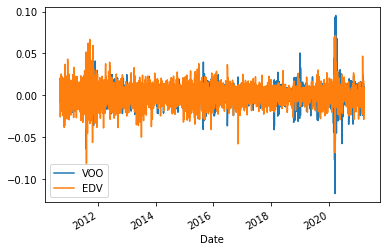

In [6]:
rate_of_change = market.get_rate_of_change()
rate_of_change.plot()


array([[<AxesSubplot:title={'center':'VOO'}>,
        <AxesSubplot:title={'center':'EDV'}>]], dtype=object)

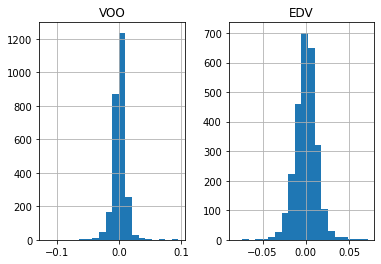

In [7]:
rate_of_change.hist(bins=20)

In [8]:
rate_of_change.describe()

,VOO,EDV
count,2649.000000,2649.000000
mean,0.000615,0.000356
std,0.010850,0.012940
min,-0.117388,-0.081443
25%,-0.003247,-0.007005
50%,0.000754,0.000714
75%,0.005552,0.007852
max,0.095364,0.071497


In [9]:
years = [str(y) for y in sorted(set(rate_of_change.index.year))]
first_complete_year = years[1]
last_complete_year = years[-2]

In [10]:
yearly_summary = rate_of_change[first_complete_year:last_complete_year] + 1.0
yearly_summary.resample("Y").prod() - 1.0

,VOO,EDV
Date,,
2011-12-31,0.018975,0.559351
2012-12-31,0.159928,0.024039
2013-12-31,0.323865,-0.198008
2014-12-31,0.129279,0.430613
2015-12-31,0.013251,-0.048461
2016-12-31,0.121668,0.015956
2017-12-31,0.217736,0.139413
2018-12-31,-0.045007,-0.034006
2019-12-31,0.313650,0.186731


<AxesSubplot:xlabel='VOO', ylabel='EDV'>

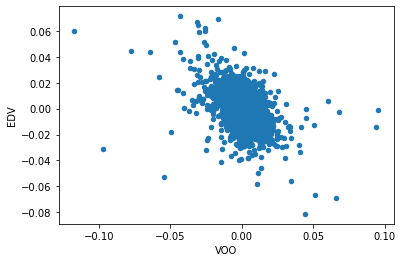

In [11]:
rate_of_change.plot.scatter(
    x = rate_of_change.columns[0],
    y = rate_of_change.columns[1]
)

In [12]:
rate_of_change.corr()




,VOO,EDV
VOO,1.000000,-0.435389
EDV,-0.435389,1.000000
